In [1]:
# Import dependencies
import numpy as np
import torch
import torchvision
from torch.utils.data.dataset import Dataset
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt

### Problem 4.4 Compare different network architectures

In [2]:
# ################## Part 1: Load data and create batch ##################
N_total = 600
N_train = 500
x = torch.unsqueeze(torch.linspace(0, 1, N_total), dim=1)
r = torch.randperm(N_total)
x = x[r, :]
y = 0.2 + 0.4 * torch.pow(x, 2) + 0.3 * x * torch.sin(15 * x) + 0.05 * torch.cos(50 * x)

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.y = y
        self.x = x

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        y1 = self.y[idx]
        x1 = self.x[idx]
        return (x1, y1)

# Change batch_size here to test different values
batch_size = 32  # Experiment with different batch sizes: 32, 64, 128
trainset = CustomDataset(x[0:N_train, :], y[0:N_train, :])
testset = CustomDataset(x[N_train:N_total, :], y[N_train:N_total, :])
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

In [3]:
# ################## Part 2: Define Different Network Architectures ##################

# Architecture 1: One hidden layer with 128 neurons
model1 = nn.Sequential(nn.Linear(1, 128),
                       nn.ReLU(),
                       nn.Linear(128, 1))

# Architecture 2: Two hidden layers with 64 and 32 neurons
model2 = nn.Sequential(nn.Linear(1, 64),
                       nn.ReLU(),
                       nn.Linear(64, 32),
                       nn.ReLU(),
                       nn.Linear(32, 1))

# Architecture 3: Three hidden layers with 128, 64, and 32 neurons
model3 = nn.Sequential(nn.Linear(1, 128),
                       nn.ReLU(),
                       nn.Linear(128, 64),
                       nn.ReLU(),
                       nn.Linear(64, 32),
                       nn.ReLU(),
                       nn.Linear(32, 1))

# Function to initialize weights
def init_weights(m):
    if isinstance(m, nn.Linear):
        m.weight.data.uniform_(-1, 1)
        m.bias.data.uniform_(-1, 1)

# Initialize weights for all models
model1.apply(init_weights)
model2.apply(init_weights)
model3.apply(init_weights)

Sequential(
  (0): Linear(in_features=1, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)

In [4]:
# ################## Part 3: Define Loss and Optimizer ##################
criterion = torch.nn.MSELoss()

# You can adjust learning rates here
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.001)

In [5]:
# ################## Part 4: Train and Test Function ##################
def train_NN(model, optimizer):
    model.train()
    for images, labels in train_loader:
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss.item()

def test_NN(model, loader):
    model.eval()
    loss = 0
    with torch.no_grad():
        for images, labels in loader:
            out = model(images)
            loss += criterion(out, labels).item()
    return loss / len(loader)

In [6]:
# ################## Part 5: Train Models and Track Loss ##################
N_epoch = 400

def run_training(model, optimizer):
    train_loss = []
    test_loss = []
    for epoch in range(N_epoch):
        train_l = train_NN(model, optimizer)
        test_l = test_NN(model, test_loader)
        train_loss.append(train_l)
        test_loss.append(test_l)
        if epoch % 50 == 0:
            print(f'Epoch {epoch}, Train Loss: {train_l}, Test Loss: {test_l}')
    return train_loss, test_loss

# Train all models
train_loss1, test_loss1 = run_training(model1, optimizer1)
train_loss2, test_loss2 = run_training(model2, optimizer2)
train_loss3, test_loss3 = run_training(model3, optimizer3)

Epoch 0, Train Loss: 0.07479037344455719, Test Loss: 0.08944946900010109
Epoch 50, Train Loss: 0.004941740073263645, Test Loss: 0.0035929790465161204
Epoch 100, Train Loss: 0.0033900178968906403, Test Loss: 0.002315645950147882
Epoch 150, Train Loss: 0.0022903752978891134, Test Loss: 0.001724892936181277
Epoch 200, Train Loss: 0.001925628981553018, Test Loss: 0.001531599715235643
Epoch 250, Train Loss: 0.0018495239783078432, Test Loss: 0.001472702089813538
Epoch 300, Train Loss: 0.0017759548500180244, Test Loss: 0.0014366970281116664
Epoch 350, Train Loss: 0.0017140982672572136, Test Loss: 0.0014248452062020078
Epoch 0, Train Loss: 0.7847273349761963, Test Loss: 1.0922124832868576
Epoch 50, Train Loss: 0.010713913477957249, Test Loss: 0.007608899031765759
Epoch 100, Train Loss: 0.006945033557713032, Test Loss: 0.0043685786658898
Epoch 150, Train Loss: 0.0035966462455689907, Test Loss: 0.0024003542494028807
Epoch 200, Train Loss: 0.0018913650419563055, Test Loss: 0.0015025963366497308
E

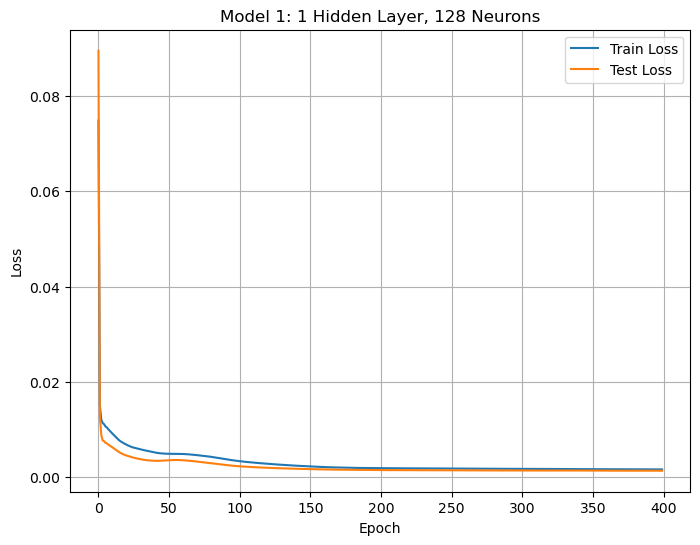

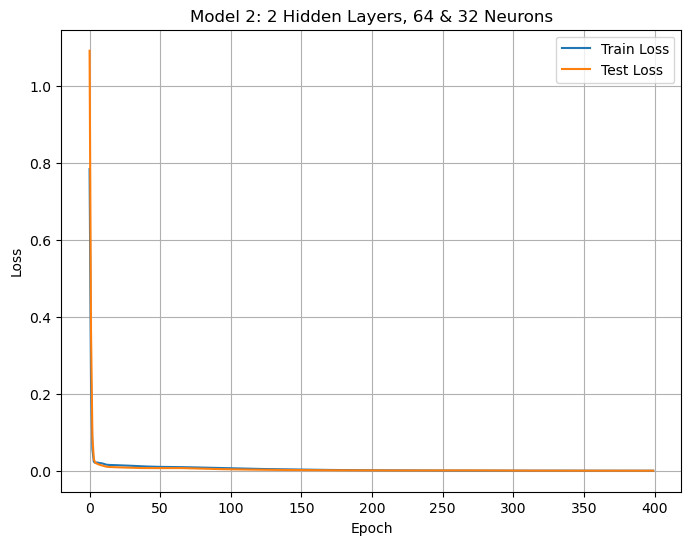

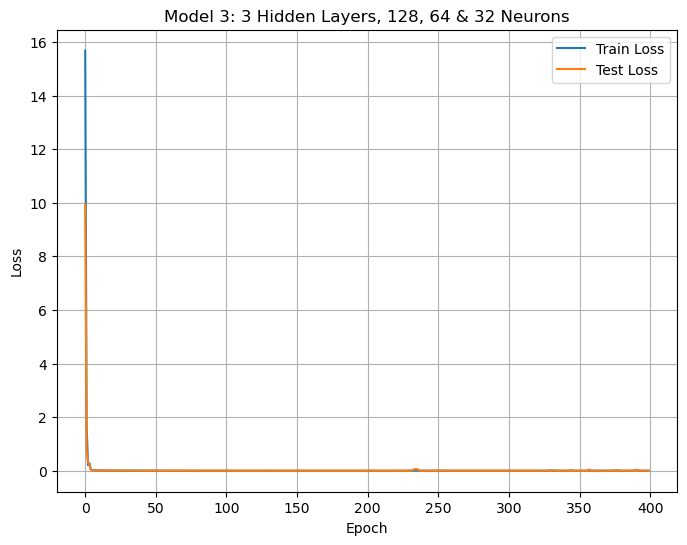

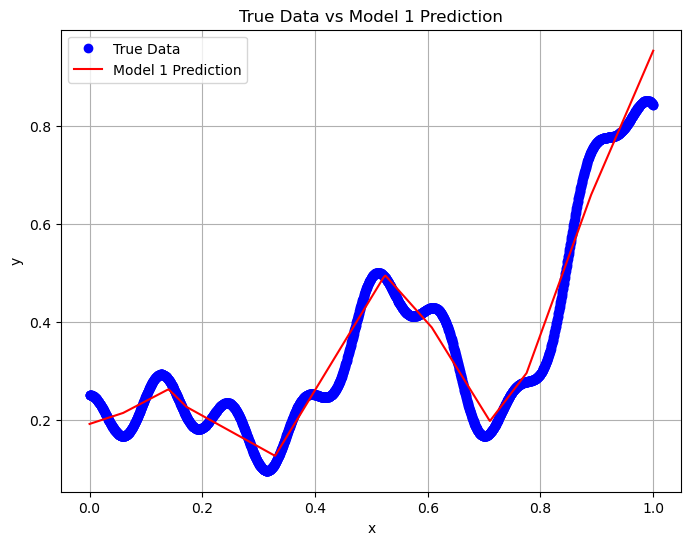

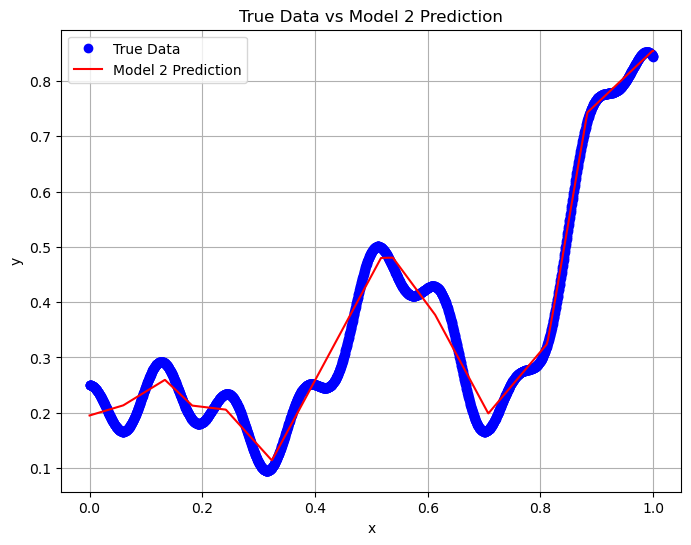

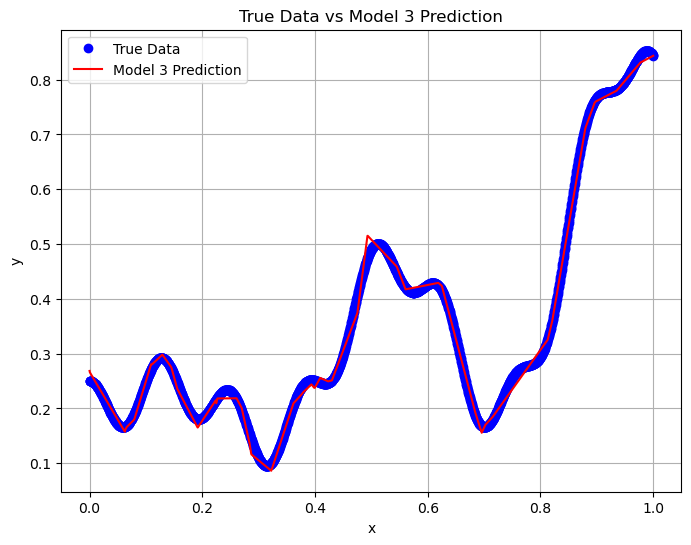

In [7]:
# ################## Part 6: Plot Results ##################

# Plot for Model 1
plt.figure(figsize=(8, 6))
plt.plot(train_loss1, label='Train Loss')
plt.plot(test_loss1, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model 1: 1 Hidden Layer, 128 Neurons')
plt.grid(True)
plt.show()

# Plot for Model 2
plt.figure(figsize=(8, 6))
plt.plot(train_loss2, label='Train Loss')
plt.plot(test_loss2, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model 2: 2 Hidden Layers, 64 & 32 Neurons')
plt.grid(True)
plt.show()

# Plot for Model 3
plt.figure(figsize=(8, 6))
plt.plot(train_loss3, label='Train Loss')
plt.plot(test_loss3, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model 3: 3 Hidden Layers, 128, 64 & 32 Neurons')
plt.grid(True)
plt.show()

# ################## Part 7: Plot Predictions ##################

# Generate test data for prediction (true data and predictions)
x_test = torch.unsqueeze(torch.linspace(0, 1, 1999), dim=1)

# Predictions for Model 1
y_pred1 = model1(x_test).detach().numpy()

# Predictions for Model 2
y_pred2 = model2(x_test).detach().numpy()

# Predictions for Model 3
y_pred3 = model3(x_test).detach().numpy()

# True data (based on original function f(x))
y_true = 0.2 + 0.4 * torch.pow(x_test, 2) + 0.3 * x_test * torch.sin(15 * x_test) + 0.05 * torch.cos(50 * x_test)

# Plot for Model 1 predictions vs true data
plt.figure(figsize=(8, 6))
plt.plot(x_test, y_true, 'bo', label='True Data')
plt.plot(x_test, y_pred1, 'r', label='Model 1 Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('True Data vs Model 1 Prediction')
plt.grid(True)
plt.show()

# Plot for Model 2 predictions vs true data
plt.figure(figsize=(8, 6))
plt.plot(x_test, y_true, 'bo', label='True Data')
plt.plot(x_test, y_pred2, 'r', label='Model 2 Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('True Data vs Model 2 Prediction')
plt.grid(True)
plt.show()

# Plot for Model 3 predictions vs true data
plt.figure(figsize=(8, 6))
plt.plot(x_test, y_true, 'bo', label='True Data')
plt.plot(x_test, y_pred3, 'r', label='Model 3 Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('True Data vs Model 3 Prediction')
plt.grid(True)
plt.show()